In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

In [2]:
base_url = 'https://understat.com/league/EPL/2018'

In [3]:
#Use requests to get the webpage and BeautifulSoup to parse the page
res = requests.get(base_url)
soup = BeautifulSoup(res.content, 'lxml')
divs = soup.find_all("div")

In [4]:
scripts = soup.find_all('script')

In [5]:
strings = scripts[1].string

In [6]:
#Strip Symbols so I only have Json data ##
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

#convert string to json format
data = json.loads(json_data)

In [7]:
pd.Series(data[0],)

id                                                       9197
isResult                                                 True
h           {'id': '89', 'title': 'Manchester United', 'sh...
a           {'id': '75', 'title': 'Leicester', 'short_titl...
goals                                    {'h': '2', 'a': '1'}
xG                            {'h': '1.5137', 'a': '1.73813'}
datetime                                  2018-08-10 22:00:00
forecast        {'w': '0.2812', 'd': '0.3275', 'l': '0.3913'}
dtype: object

In [8]:
df = pd.DataFrame(columns=["id", "isResult" ,"h", "a", 'goals', 'xG', 'datetime', 'forecast'])

In [9]:
for i in range(0,len(data)) :
    currentItem = data[i]
    df.loc[i] = [data[i]["id"], data[i]["isResult"],data[i]["h"],data[i]["a"],data[i]["goals"],data[i]["xG"],data[i]["datetime"],data[i]["forecast"]]


In [10]:
df

,id,isResult,h,a,goals,xG,datetime,forecast
0,9197,True,"{'id': '89', 'title': 'Manchester United', 'sh...","{'id': '75', 'title': 'Leicester', 'short_titl...","{'h': '2', 'a': '1'}","{'h': '1.5137', 'a': '1.73813'}",2018-08-10 22:00:00,"{'w': '0.2812', 'd': '0.3275', 'l': '0.3913'}"
1,9198,True,"{'id': '86', 'title': 'Newcastle United', 'sho...","{'id': '82', 'title': 'Tottenham', 'short_titl...","{'h': '1', 'a': '2'}","{'h': '0.974497', 'a': '2.58097'}",2018-08-11 14:30:00,"{'w': '0.08', 'd': '0.1479', 'l': '0.7721'}"
2,9199,True,"{'id': '90', 'title': 'Watford', 'short_title'...","{'id': '220', 'title': 'Brighton', 'short_titl...","{'h': '2', 'a': '0'}","{'h': '1.42372', 'a': '0.45504'}",2018-08-11 17:00:00,"{'w': '0.6438', 'd': '0.2574', 'l': '0.0988'}"
3,9200,True,"{'id': '219', 'title': 'Huddersfield', 'short_...","{'id': '80', 'title': 'Chelsea', 'short_title'...","{'h': '0', 'a': '3'}","{'h': '0.396115', 'a': '2.31427'}",2018-08-11 17:00:00,"{'w': '0.0214', 'd': '0.1011', 'l': '0.8775'}"
4,9201,True,"{'id': '228', 'title': 'Fulham', 'short_title'...","{'id': '78', 'title': 'Crystal Palace', 'short...","{'h': '0', 'a': '2'}","{'h': '0.638076', 'a': '1.07816'}",2018-08-11 17:00:00,"{'w': '0.2004', 'd': '0.3242', 'l': '0.4754'}"
...,...,...,...,...,...,...,...,...
375,9572,True,"{'id': '75', 'title': 'Leicester', 'short_titl...","{'id': '80', 'title': 'Chelsea', 'short_title'...","{'h': '0', 'a': '0'}","{'h': '0.345306', 'a': '1.26735'}",2019-05-12 14:00:00,"{'w': '0.0796', 'd': '0.2696', 'l': '0.6508'}"
376,9573,True,"{'id': '228', 'title': 'Fulham', 'short_title'...","{'id': '86', 'title': 'Newcastle United', 'sho...","{'h': '0', 'a': '4'}","{'h': '0.569845', 'a': '1.95921'}",2019-05-12 14:00:00,"{'w': '0.0613', 'd': '0.1596', 'l': '0.7791'}"
377,9574,True,"{'id': '78', 'title': 'Crystal Palace', 'short...","{'id': '73', 'title': 'Bournemouth', 'short_ti...","{'h': '5', 'a': '3'}","{'h': '2.85899', 'a': '1.8981'}",2019-05-12 14:00:00,"{'w': '0.6162', 'd': '0.1984', 'l': '0.1854'}"
378,9575,True,"{'id': '92', 'title': 'Burnley', 'short_title'...","{'id': '83', 'title': 'Arsenal', 'short_title'...","{'h': '1', 'a': '3'}","{'h': '1.72939', 'a': '2.87276'}",2019-05-12 14:00:00,"{'w': '0.1514', 'd': '0.1901', 'l': '0.6585'}"


In [11]:
columnsplit=df['h'].apply(pd.Series)

In [38]:
columnsplit['title']

0      Manchester United
1       Newcastle United
2                Watford
3           Huddersfield
4                 Fulham
             ...        
375            Leicester
376               Fulham
377       Crystal Palace
378              Burnley
379             Brighton
Name: title, Length: 380, dtype: object

In [39]:
df['Home_Club'] = columnsplit['title']

In [14]:
columnsplitaway=df['a'].apply(pd.Series)

In [40]:
columnsplitaway['title']

0             Leicester
1             Tottenham
2              Brighton
3               Chelsea
4        Crystal Palace
             ...       
375             Chelsea
376    Newcastle United
377         Bournemouth
378             Arsenal
379     Manchester City
Name: title, Length: 380, dtype: object

In [41]:
df['Away_Club'] = columnsplitaway['title']

In [42]:
new_df = df[['Home_Club', 'Away_Club', 'goals']]

In [43]:
splitgoals = new_df['goals'].apply(pd.Series)

In [44]:
home_goals= splitgoals['h']


In [45]:
away_goals= splitgoals['a']

In [46]:
new_df['home_goals'] = home_goals

<ipython-input-46-dc1dcbbf186c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['home_goals'] = home_goals


In [47]:
new_df['away_goals'] = away_goals

<ipython-input-47-00ab1ab199cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['away_goals'] = away_goals


In [48]:
new_df

,Home_Club,Away_Club,goals,home_goals,away_goals
0,Manchester United,Leicester,"{'h': '2', 'a': '1'}",2,1
1,Newcastle United,Tottenham,"{'h': '1', 'a': '2'}",1,2
2,Watford,Brighton,"{'h': '2', 'a': '0'}",2,0
3,Huddersfield,Chelsea,"{'h': '0', 'a': '3'}",0,3
4,Fulham,Crystal Palace,"{'h': '0', 'a': '2'}",0,2
...,...,...,...,...,...
375,Leicester,Chelsea,"{'h': '0', 'a': '0'}",0,0
376,Fulham,Newcastle United,"{'h': '0', 'a': '4'}",0,4
377,Crystal Palace,Bournemouth,"{'h': '5', 'a': '3'}",5,3
378,Burnley,Arsenal,"{'h': '1', 'a': '3'}",1,3


In [49]:
finaldf = new_df[['Home_Club', 'Away_Club', 'home_goals', 'away_goals']]

In [50]:

    finaldf.loc[finaldf['home_goals'] > finaldf['away_goals'], 'RESULT'] = 'H'
finaldf.loc[finaldf['home_goals'] == finaldf['away_goals'], 'RESULT'] = 'D'
finaldf.loc[finaldf['home_goals'] < finaldf['away_goals'], 'RESULT'] = 'A'

In [51]:
finaldf['season'] = '2018/2019'

In [52]:
finaldf

,Home_Club,Away_Club,home_goals,away_goals,RESULT,season
0,Manchester United,Leicester,2,1,H,2018/2019
1,Newcastle United,Tottenham,1,2,A,2018/2019
2,Watford,Brighton,2,0,H,2018/2019
3,Huddersfield,Chelsea,0,3,A,2018/2019
4,Fulham,Crystal Palace,0,2,A,2018/2019
...,...,...,...,...,...,...
375,Leicester,Chelsea,0,0,D,2018/2019
376,Fulham,Newcastle United,0,4,A,2018/2019
377,Crystal Palace,Bournemouth,5,3,H,2018/2019
378,Burnley,Arsenal,1,3,A,2018/2019


In [53]:
import openpyxl
finaldf.to_excel("output1819.xlsx",
             sheet_name='Sheet_name_1')  

In [34]:
import pandas as pd

df1 = pd.read_csv(r'c:/Users/Adam/Downloads/results.csv')
print (df1)

              home_team         away_team  home_goals  away_goals result  \
0      Sheffield United         Liverpool         1.0         1.0      D   
1               Arsenal       Aston Villa         1.0         1.0      D   
2               Everton           Watford         2.0         1.0      H   
3      Newcastle United    Wigan Athletic         2.0         1.0      H   
4            Portsmouth  Blackburn Rovers         3.0         0.0      H   
...                 ...               ...         ...         ...    ...   
4555   Newcastle United           Chelsea         3.0         0.0      H   
4556        Southampton   Manchester City         0.0         1.0      A   
4557       Swansea City        Stoke City         1.0         2.0      A   
4558  Tottenham Hotspur    Leicester City         5.0         4.0      H   
4559    West Ham United           Everton         3.0         1.0      H   

         season  
0     2006-2007  
1     2006-2007  
2     2006-2007  
3     2006-2007

In [37]:
df1.head(10)

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1.0,1.0,D,2006-2007
1,Arsenal,Aston Villa,1.0,1.0,D,2006-2007
2,Everton,Watford,2.0,1.0,H,2006-2007
3,Newcastle United,Wigan Athletic,2.0,1.0,H,2006-2007
4,Portsmouth,Blackburn Rovers,3.0,0.0,H,2006-2007
5,Reading,Middlesbrough,3.0,2.0,H,2006-2007
6,West Ham United,Charlton Athletic,3.0,1.0,H,2006-2007
7,Bolton Wanderers,Tottenham Hotspur,2.0,0.0,H,2006-2007
8,Manchester United,Fulham,5.0,1.0,H,2006-2007
9,Chelsea,Manchester City,3.0,0.0,H,2006-2007


In [63]:
finaldf['home_team'] = finaldf['Home_Club']
finaldf['away_team'] = finaldf['Away_Club']
finaldf['result'] = finaldf['RESULT']


finaldf
df2 = finaldf[['home_team', 'away_team', 'home_goals', 'away_goals', 'result', 'season']]
df2

,home_team,away_team,home_goals,away_goals,result,season
0,Manchester United,Leicester,2,1,H,2018/2019
1,Newcastle United,Tottenham,1,2,A,2018/2019
2,Watford,Brighton,2,0,H,2018/2019
3,Huddersfield,Chelsea,0,3,A,2018/2019
4,Fulham,Crystal Palace,0,2,A,2018/2019
...,...,...,...,...,...,...
375,Leicester,Chelsea,0,0,D,2018/2019
376,Fulham,Newcastle United,0,4,A,2018/2019
377,Crystal Palace,Bournemouth,5,3,H,2018/2019
378,Burnley,Arsenal,1,3,A,2018/2019


In [64]:
testdf = df2.append(df1)

In [65]:
testdf

,home_team,away_team,home_goals,away_goals,result,season
0,Manchester United,Leicester,2,1,H,2018/2019
1,Newcastle United,Tottenham,1,2,A,2018/2019
2,Watford,Brighton,2,0,H,2018/2019
3,Huddersfield,Chelsea,0,3,A,2018/2019
4,Fulham,Crystal Palace,0,2,A,2018/2019
...,...,...,...,...,...,...
4555,Newcastle United,Chelsea,3.0,0.0,H,2017-2018
4556,Southampton,Manchester City,0.0,1.0,A,2017-2018
4557,Swansea City,Stoke City,1.0,2.0,A,2017-2018
4558,Tottenham Hotspur,Leicester City,5.0,4.0,H,2017-2018


In [75]:
import pandas as pd
import csv



df3 = pd.read_excel(r'c:/Users/Adam/Downloads/output1920.xlsx')
print (df3)

     Unnamed: 0       Home_Club                Away_Club  home_goals  \
0             0       Liverpool                  Norwich           4   
1             1        West Ham          Manchester City           0   
2             2     Bournemouth         Sheffield United           1   
3             3         Burnley              Southampton           3   
4             4  Crystal Palace                  Everton           0   
..          ...             ...                      ...         ...   
375         375       Leicester        Manchester United           0   
376         376         Everton              Bournemouth           1   
377         377  Crystal Palace                Tottenham           1   
378         378         Chelsea  Wolverhampton Wanderers           2   
379         379         Burnley                 Brighton           1   

     away_goals RESULT     season  
0             1      H  2019/2020  
1             5      A  2019/2020  
2             1      D  201

In [76]:
df3['home_team'] = df3['Home_Club']
df3['away_team'] = df3['Away_Club']
df3['result'] = df3['RESULT']


finaldf
df3 = df3[['home_team', 'away_team', 'home_goals', 'away_goals', 'result', 'season']]
df3

,home_team,away_team,home_goals,away_goals,result,season
0,Liverpool,Norwich,4,1,H,2019/2020
1,West Ham,Manchester City,0,5,A,2019/2020
2,Bournemouth,Sheffield United,1,1,D,2019/2020
3,Burnley,Southampton,3,0,H,2019/2020
4,Crystal Palace,Everton,0,0,D,2019/2020
...,...,...,...,...,...,...
375,Leicester,Manchester United,0,2,A,2019/2020
376,Everton,Bournemouth,1,3,A,2019/2020
377,Crystal Palace,Tottenham,1,1,D,2019/2020
378,Chelsea,Wolverhampton Wanderers,2,0,H,2019/2020


In [77]:
epldf =  testdf.append(df3)

In [78]:
epldf

,home_team,away_team,home_goals,away_goals,result,season
0,Manchester United,Leicester,2,1,H,2018/2019
1,Newcastle United,Tottenham,1,2,A,2018/2019
2,Watford,Brighton,2,0,H,2018/2019
3,Huddersfield,Chelsea,0,3,A,2018/2019
4,Fulham,Crystal Palace,0,2,A,2018/2019
...,...,...,...,...,...,...
375,Leicester,Manchester United,0,2,A,2019/2020
376,Everton,Bournemouth,1,3,A,2019/2020
377,Crystal Palace,Tottenham,1,1,D,2019/2020
378,Chelsea,Wolverhampton Wanderers,2,0,H,2019/2020


In [169]:
Manu = epldf['home_team'] == 'Manchester United'

In [170]:
manutd = epldf[Manu]

In [199]:
##wins = manutd['result'] == 'H'
##losses = manutd['result'] == 'A' 
manutd[['home_goals']].sum()

TypeError: '>' not supported between instances of 'list' and 'int'

In [172]:
manutd[wins].count(home_goals)

,home_team,away_team,home_goals,away_goals,result,season
0,Manchester United,Leicester,2,1,H,2018/2019
76,Manchester United,Newcastle United,3,2,H,2018/2019
98,Manchester United,Everton,2,1,H,2018/2019
152,Manchester United,Fulham,4,1,H,2018/2019
182,Manchester United,Huddersfield,3,1,H,2018/2019
...,...,...,...,...,...,...
215,Manchester United,Norwich,4,0,H,2019/2020
266,Manchester United,Watford,3,0,H,2019/2020
286,Manchester United,Manchester City,2,0,H,2019/2020
305,Manchester United,Sheffield United,3,0,H,2019/2020


In [173]:
newstat = manutd[wins].groupby('season').count()
newstat1 = manutd[losses].groupby('season').count()



In [174]:
newstat['Team']= 'Manchester United'
newstat1['Team']= 'Manchester United'

In [175]:
newstat['wins'] = newstat['result']
newstat['losses'] = newstat1['result']

In [176]:
##newstat[['Team', 'wins']]
homerecord = newstat[['Team', 'wins' ,'losses']]

In [177]:
Manuaway = epldf['away_team'] == 'Manchester United'

In [178]:
manutdaway = epldf[Manuaway]

In [179]:
awaywins = manutdaway['result'] == 'A'
awaylosses = manutdaway['result'] == 'H' 

In [180]:
awaynewstat = manutdaway[awaywins].groupby('season').count()
awaynewstat1 = manutdaway[awaylosses].groupby('season').count()


In [181]:
awaynewstat['Team']= 'Manchester United'
awaynewstat1['Team']= 'Manchester United'

In [182]:
awaynewstat['awaywins'] = awaynewstat['result']
awaynewstat['awaylosses'] = awaynewstat1['result']

In [183]:

awayrecord = awaynewstat[['Team', 'awaywins', 'awaylosses']]

In [207]:
merge = homerecord.merge(awayrecord, how='left', on = 'season')
merge1= merge.fillna(0)

In [209]:
merge1['totalwins'] = merge1['wins'] + merge1['awaywins']
merge1['totallosses'] = merge1['losses'] + merge1['awaylosses']

In [210]:
merge1

,Team_x,wins,losses,Team_y,awaywins,awaylosses,totalwins,totallosses
season,,,,,,,,
2006-2007,Manchester United,15,2.0,Manchester United,13,3,28,5.0
2007-2008,Manchester United,17,1.0,Manchester United,10,4,27,5.0
2008-2009,Manchester United,16,1.0,Manchester United,12,3,28,4.0
2009-2010,Manchester United,16,2.0,Manchester United,11,5,27,7.0
2010-2011,Manchester United,18,0.0,Manchester United,5,4,23,4.0
2011-2012,Manchester United,15,2.0,Manchester United,13,3,28,5.0
2012-2013,Manchester United,16,3.0,Manchester United,12,2,28,5.0
2013-2014,Manchester United,9,7.0,Manchester United,10,5,19,12.0
2014-2015,Manchester United,14,3.0,Manchester United,6,5,20,8.0


In [211]:
manutable = merge1[['Team_x', 'losses', 'awaywins', 'awaylosses', 'totalwins', 'totallosses']]

In [212]:
manutable

,Team_x,losses,awaywins,awaylosses,totalwins,totallosses
season,,,,,,
2006-2007,Manchester United,2.0,13,3,28,5.0
2007-2008,Manchester United,1.0,10,4,27,5.0
2008-2009,Manchester United,1.0,12,3,28,4.0
2009-2010,Manchester United,2.0,11,5,27,7.0
2010-2011,Manchester United,0.0,5,4,23,4.0
2011-2012,Manchester United,2.0,13,3,28,5.0
2012-2013,Manchester United,3.0,12,2,28,5.0
2013-2014,Manchester United,7.0,10,5,19,12.0
2014-2015,Manchester United,3.0,6,5,20,8.0


In [220]:
manutablenew = manutable.reset_index()

In [226]:
 data_winsVseason = manutablenew[['totalwins', 'season']] #Extracting out wins for every season.

data_lossVseason = manutablenew[['totallosses', 'season']] #Extracting out losses for every season.

,season,Team_x,losses,awaywins,awaylosses,totalwins,totallosses
0,2006-2007,Manchester United,2.0,13,3,28,5.0
1,2007-2008,Manchester United,1.0,10,4,27,5.0
2,2008-2009,Manchester United,1.0,12,3,28,4.0
3,2009-2010,Manchester United,2.0,11,5,27,7.0
4,2010-2011,Manchester United,0.0,5,4,23,4.0
5,2011-2012,Manchester United,2.0,13,3,28,5.0
6,2012-2013,Manchester United,3.0,12,2,28,5.0
7,2013-2014,Manchester United,7.0,10,5,19,12.0
8,2014-2015,Manchester United,3.0,6,5,20,8.0
9,2015-2016,Manchester United,2.0,7,8,19,10.0


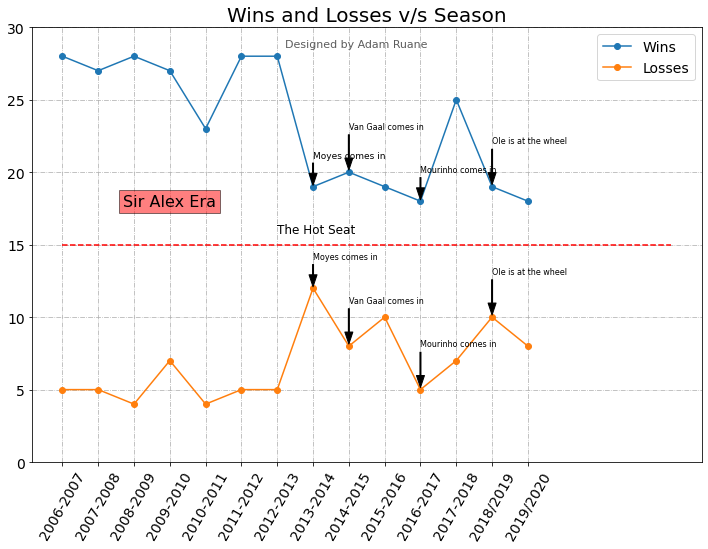

In [302]:

import matplotlib.pyplot as plt
%matplotlib inline
#Plotting Wins and Losses v/s Season
plt.rcParams['figure.figsize'] = [12, 8] #creates a graph of 10x7 inches
plt.plot(data_winsVseason.season, data_winsVseason.totalwins, label = 'Wins', marker='o') #plot Wins v Season
plt.plot(data_lossVseason.season, data_lossVseason.totallosses, label = 'Losses', marker='o') 

#plot Loss vs Season, with markers and label
plt.ylim(0,30) #for setting y limits from 15 to 30.
plt.grid(which='major', axis='both', linestyle='-.', linewidth=0.75) #plotting grid. See pyplot.grid in Google.
plt.xticks(rotation=60, fontsize=14) #rotate x axis labels and increase font.
plt.yticks(fontsize=14) #increase yticks fontsize.
plt.legend(fontsize=14) #show labels as legend
plt.title('Wins and Losses v/s Season', fontsize = 20)
plt.suptitle('Designed by Adam Ruane',  color='#4B4B4B' ,y=.86, fontsize=11, alpha=0.9)

try: #try catch is used because here x-coord is a string like 2006-2007 and hence gives a TypeError. So TypeError errors are overlooked in except statement.


    plt.annotate('The Hot Seat', xy=(6, 15.6),size=12, ha='left', va="bottom")
    x_coordinates = [0, 17] 
    y_coordinates = [15, 15]
    plt.plot(x_coordinates, y_coordinates, color = 'red',linestyle='dashed')
    plt.annotate('Moyes comes in', xy=('2013-2014',19), xytext=('2013-2014', 21),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =9) 
    #For the wins curve. The label is Moyes comes in.
    #xy is the position of marker point. xytext is position of label text. 
    
    
    plt.annotate('Moyes comes in', xy=('2013-2014',12), xytext=('2013-2014', 14),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve. The label is Moyes comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',20), xytext=('2014-2015', 23),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when LVG comes in.
    
    plt.annotate('Van Gaal comes in', xy=('2014-2015',8), xytext=('2014-2015', 11),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    #For losses curve when LVG comes in.
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',18), xytext=('2016-2017', 20),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For wins curve when Mou comes in. 
    
    plt.annotate('Mourinho comes in', xy=('2016-2017',5), xytext=('2016-2017', 8),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    #For losses curve when Mou comes in. 
    plt.annotate('Ole is at the wheel', xy=('2018/2019',19), xytext=('2018/2019', 22),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8)
    plt.annotate('Ole is at the wheel', xy=('2018/2019',10), xytext=('2018/2019', 13),arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8), fontsize =8) 
    
    plt.text('2009-2010',18,'Sir Alex Era', horizontalalignment='center', verticalalignment='center', fontsize =16, bbox=dict(facecolor='red', alpha=0.5)) 
    #For the middle big text
except TypeError: 
    pass

,Team_x,losses,awaywins,awaylosses,totalwins,totallosses
season,,,,,,
2006-2007,Manchester United,2.0,13,3,28,5.0
2007-2008,Manchester United,1.0,10,4,27,5.0
2008-2009,Manchester United,1.0,12,3,28,4.0
2009-2010,Manchester United,2.0,11,5,27,7.0
2010-2011,Manchester United,0.0,5,4,23,4.0
2011-2012,Manchester United,2.0,13,3,28,5.0
2012-2013,Manchester United,3.0,12,2,28,5.0
2013-2014,Manchester United,7.0,10,5,19,12.0
2014-2015,Manchester United,3.0,6,5,20,8.0
